In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import json

2024-03-15 13:52:05.036500: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 13:52:05.036546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 13:52:05.037888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 13:52:05.046530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 13:52:06.021506: W tensorflow/compiler/tf2

In [3]:
path = "./data/val/img/"
path_ = "./data/val/ann/"

In [4]:
X_train = np.zeros((len(os.listdir(path)), 42, 128))
y_train = np.zeros((len(os.listdir(path_)), 9, 23))

dist_items = { '0':'0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6', '7': '7', '8': '8', '9': '9',
               'A':'10' , 'B':'11', 'E':'12', 'K':'13', 'M':'14', 'H': '15', 'O': '16', 'P': '17',
               'C':'18' , 'T':'19' , 'Y': '20', 'X': '21', ' ': '22'}


list_items = ('0', '1', '2', '3', '4', '5', '6', '7', '8' , '9', '10',
               '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22')

list_items = tf.keras.utils.to_categorical(list_items)

In [5]:
for i in range(len(os.listdir(path))):
    img = cv.imread(os.path.join(path, sorted(os.listdir(path))[i]))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #img = cv.threshold(img, 64, 255, cv.THRESH_BINARY_INV)[1]
    img = cv.resize(img, (128, 42))
    X_train[i] = img / 255.0

    ann = os.path.join(path_, sorted(os.listdir(path_))[i])

    with open(ann) as f:
        templates = json.load(f)
    templates['description']
    list_temp = []
    for j in templates['description']:
        list_temp.append(j)

    y_list = []
    for j in list_temp:
        y_list.append(list_items[int(dist_items.get(j))])

    if len(y_list) < 9:
        y_list.append(list_items[int(dist_items.get(" "))])
        
    y_train[i] = np.array(y_list, dtype="int8")
    print(f"{i}/{len(os.listdir(path_))} {i/len(os.listdir(path_))}")
    break
    


0/4893 0.0


In [6]:
X_train[0]

array([[0.27843137, 0.25882353, 0.23921569, ..., 0.31372549, 0.32156863,
        0.32156863],
       [0.26666667, 0.25882353, 0.23529412, ..., 0.31372549, 0.32156863,
        0.3372549 ],
       [0.2627451 , 0.23921569, 0.23137255, ..., 0.3254902 , 0.3372549 ,
        0.34117647],
       ...,
       [0.38039216, 0.2       , 0.1254902 , ..., 0.04313725, 0.37254902,
        0.55294118],
       [0.39607843, 0.22745098, 0.10196078, ..., 0.03529412, 0.40392157,
        0.54901961],
       [0.41568627, 0.25490196, 0.10588235, ..., 0.05490196, 0.4627451 ,
        0.5372549 ]])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


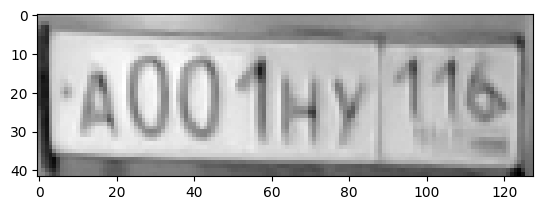

In [8]:
print(y_train[2])
plt.imshow(X_train[2], cmap="gray")

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [18]:
shp = X_train.shape[1:]

(42, 128)

2024-03-15 13:13:22.543718: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-15 13:13:22.659184: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-15 13:13:22.659433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 42, 128, 1)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 42, 128, 32)          320       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 42, 128, 32)          0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 42, 128, 32)          9248      ['dropout[0][0]']             
                                                                                              

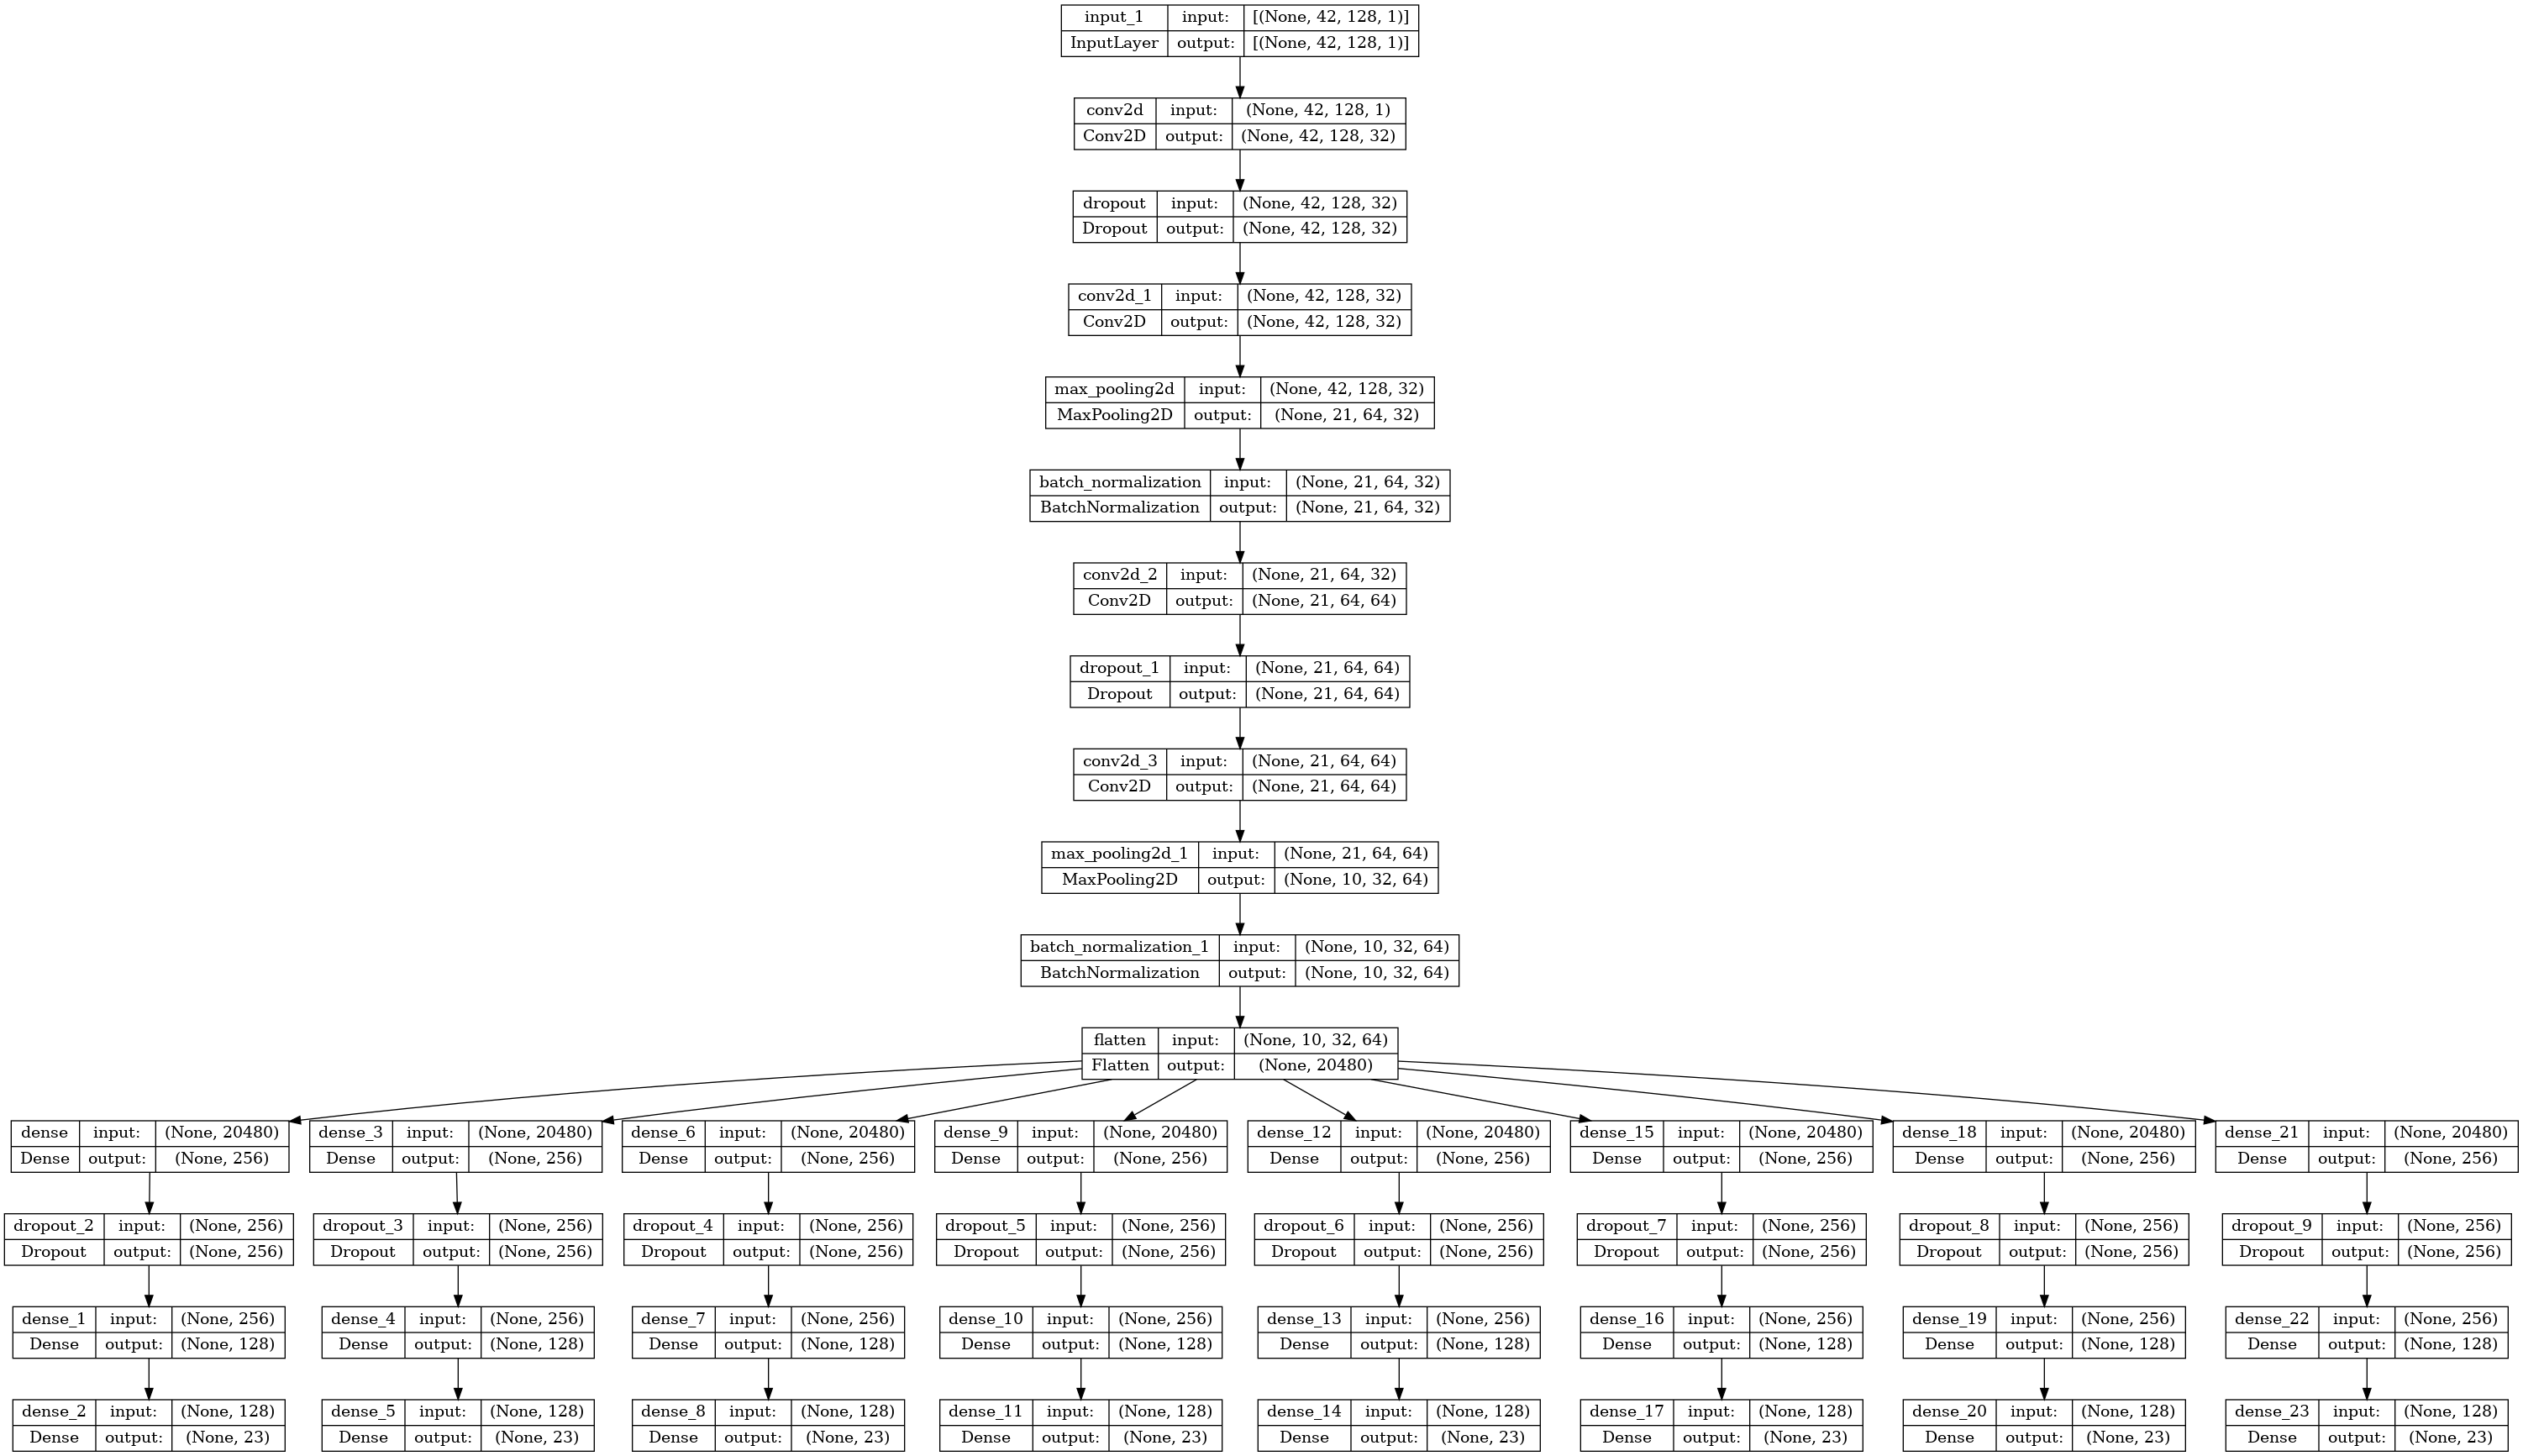

In [10]:
input_shape = (42, 128, 1)

def build_model():
    input = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = Dropout(0.2)(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Dropout(0.2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)

    flatten = Flatten()(x)

    output = []
    for _ in range(0, 8):
        x2 = Dense(256, activation='relu')(flatten)
        x2 = Dropout(0.2)(x2)
        x2 = Dense(128, activation='relu')(x2)
        x2 = Dense(23, activation='softmax')(x2)
        output.append(x2)

    model = Model(inputs=input, outputs=output)

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

model = build_model()
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
y_train.shape
y_train[:, 1]
train = []
for i in range(0, 8):
    train.append(y_train[:, i])

In [12]:
model.fit(X_train, train, epochs=100, batch_size=64)

Epoch 1/100


2024-03-15 13:13:48.788670: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-03-15 13:13:51.448547: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-15 13:13:52.746344: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 13:13:53.076353: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 13:13:53.937273: I external/local_xla/xla/service/service.cc:168] XLA service 0x74e0f400d710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-15 13:13:53.937299: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, C

77/77 [==============================] - 16s 52ms/step - loss: 20.1635 - dense_2_loss: 2.6760 - dense_5_loss: 2.4416 - dense_8_loss: 2.5020 - dense_11_loss: 2.4716 - dense_14_loss: 2.7410 - dense_17_loss: 2.7445 - dense_20_loss: 2.0871 - dense_23_loss: 2.4997 - dense_2_accuracy: 0.1445 - dense_5_accuracy: 0.1913 - dense_8_accuracy: 0.1835 - dense_11_accuracy: 0.1741 - dense_14_accuracy: 0.1059 - dense_17_accuracy: 0.1097 - dense_20_accuracy: 0.3466 - dense_23_accuracy: 0.2007
Epoch 2/100
77/77 [==============================] - 3s 35ms/step - loss: 9.6760 - dense_2_loss: 1.3512 - dense_5_loss: 0.7453 - dense_8_loss: 0.8034 - dense_11_loss: 0.8479 - dense_14_loss: 1.6756 - dense_17_loss: 1.6267 - dense_20_loss: 1.1190 - dense_23_loss: 1.5069 - dense_2_accuracy: 0.5434 - dense_5_accuracy: 0.7515 - dense_8_accuracy: 0.7372 - dense_11_accuracy: 0.7221 - dense_14_accuracy: 0.4259 - dense_17_accuracy: 0.4386 - dense_20_accuracy: 0.6199 - dense_23_accuracy: 0.4909
Epoch 3/100
77/77 [=========

KeyboardInterrupt: 

In [13]:
pred = model.predict(X_train)

153/153 [==============================] - 1s 4ms/step


0
1
2
3
4
5
6
7


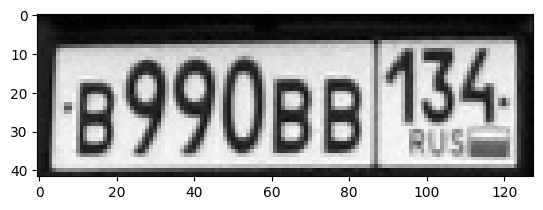

In [25]:
items = ('0', '1', '2', '3', '4', '5', '6', '7', '8' , '9', '10',
               '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22')

dist_items = { '0':'0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6', '7': '7', '8': '8', '9': '9',
               'A':'10' , 'B':'11', 'E':'12', 'K':'13', 'M':'14', 'H': '15', 'O': '16', 'P': '17',
               'C':'18' , 'T':'19' , 'Y': '20', 'X': '21', ' ': '22'}

for i in range(0, 9):
    print(items[np.argmax(pred[i][1234])])

plt.imshow(X_train[1234], cmap="gray")

In [26]:
model.save("ocr_model.h5")

/home/ivan/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
